# Darya Amirbeigi 

## How has life expectancy, economy, and social support contributed to the average global happiness index from 2015-2021?
### As an immigrant, I've had the privilege to live in Iran and Canada, two nations that are incredibly distinct from one another in every way, including their rankings for happiness, economies, life expectancies, social support, and levels of freedom. A nation's overall happiness score can be attributed to a wide range of factors. According to analysis 1, it appears that the three factors that most strongly correlate with average worldwide happiness over time in each nation are life expectancy, the economy, and social support. For my analysis, I’m interested to see  how has life expectancy, economy, and social support contributed to the average global happiness index from 2015-2021 and which year has had the highest score of happiness based on the factors mentioned. 


# Task 1: EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

df1 = pd.read_csv('../data/raw/world_happiness_report.csv')

print(df1)

      Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   
1224        

In [ ]:
d1 = df1.shape
d2 = df1.head()
d3 = df1.columns
print(d1)
print(d2)
print(d3)

(1229, 12)
   Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Gene

In [ ]:
df1 = df1.transform(pd.to_numeric, errors='coerce')


###### Here I change my variables in the dataset into numeric for future visualization.

In [ ]:
print(df1['Year'].unique())


[2015 2016 2017 2018 2019 2020 2021 2022]


###### Because my question is based on years, I checked to see what years I'm working with. 

<seaborn.axisgrid.PairGrid>

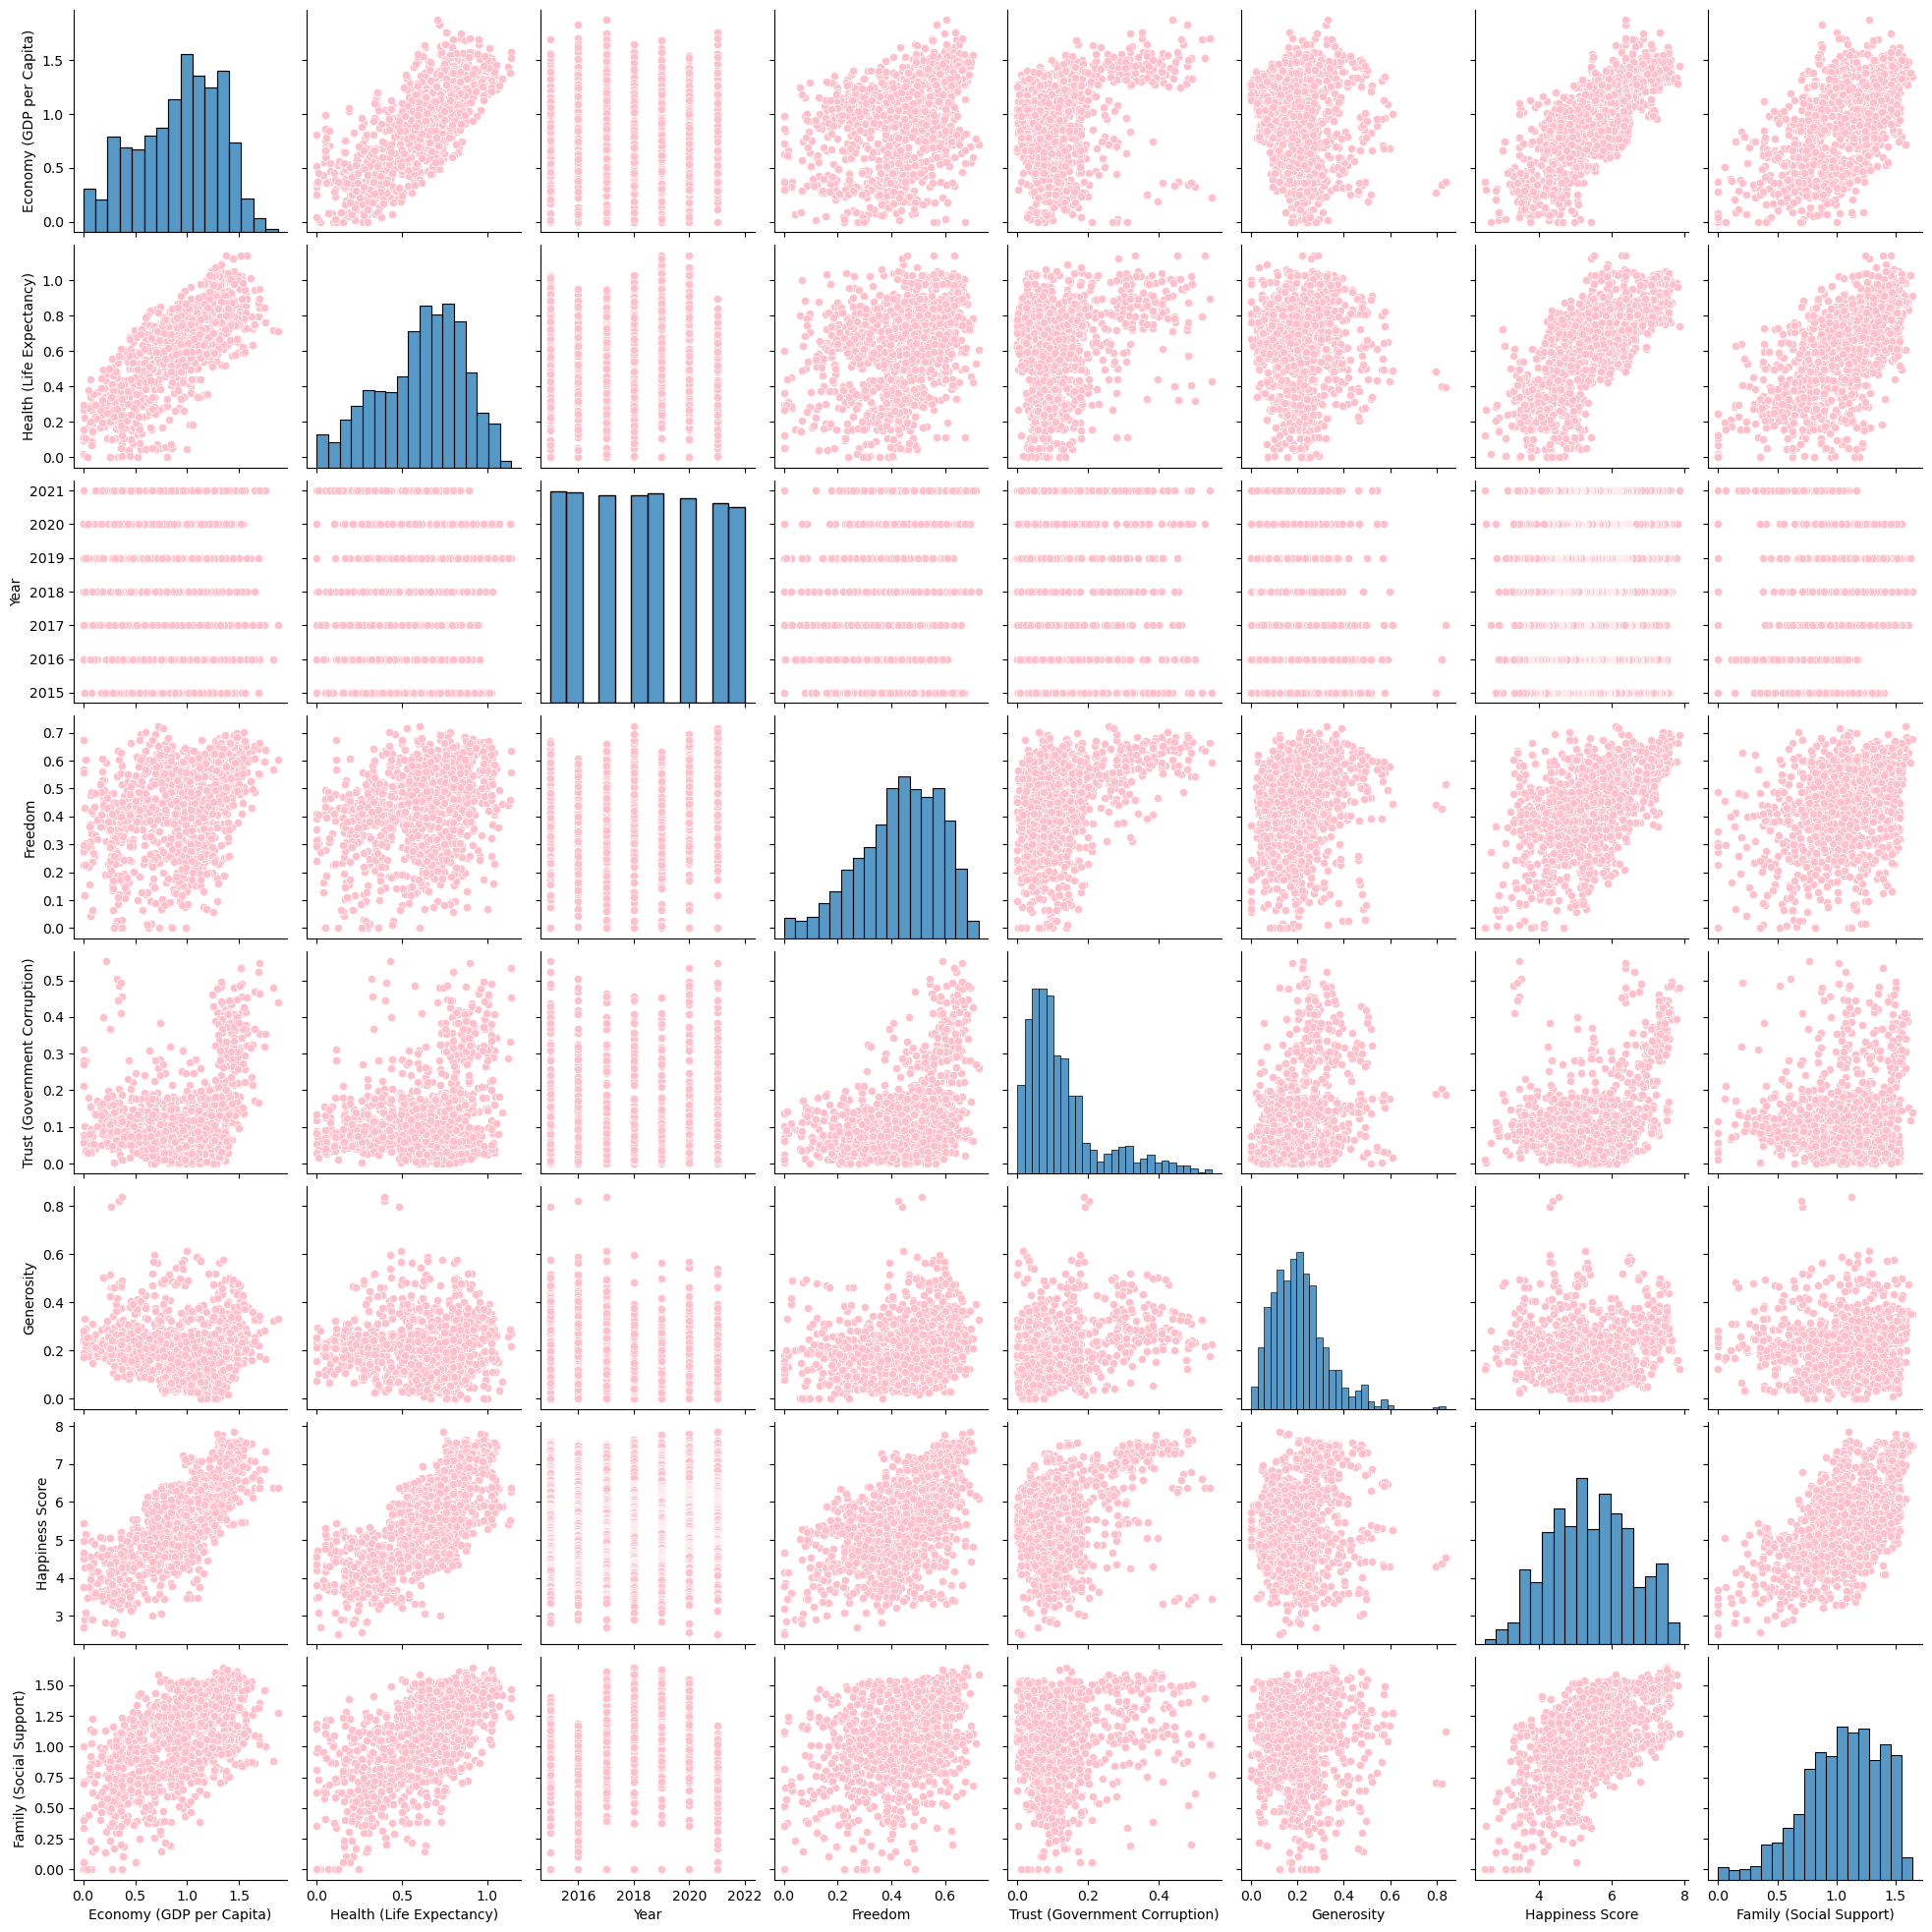

In [ ]:
sns.pairplot(df1[["Economy (GDP per Capita)",'Health (Life Expectancy)', 'Year', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score',"Family (Social Support)"]], plot_kws={'color':'pink'})

###### By graphing a pair plot, I can see all the scatterplots between my variables in the dataset and I can easily tell which variables have a positive correlation and which ones I need for my future visualization. By looking at this graph, I can see that Economy (GDP per Capita), Health (Life Expectancy), and Family (Social Support) all have a positive correlation with Happiness Score. So in my next task, I will be dropping the columns that don't have a strong positive correlation with Happiness Score. 

Text(0.5, 1.0, 'Correlation between the variables in dataset')

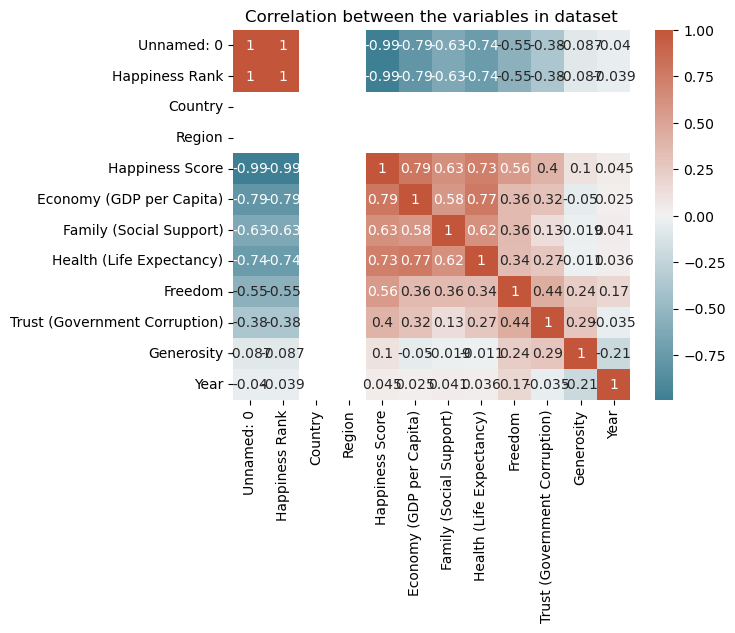

In [ ]:
corr = df1.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set_title("Correlation between the variables in dataset")


###### This graph shows that all variables and columns in the dataset are positively correlated. The highest correlation is between economy (0.79) and happiness score following by life expectancy (0.74) and social support (0.63). I just wanted to make sure all the variables are correlated and this graph did a great job of showing what I needed to see.

<seaborn.axisgrid.FacetGrid>

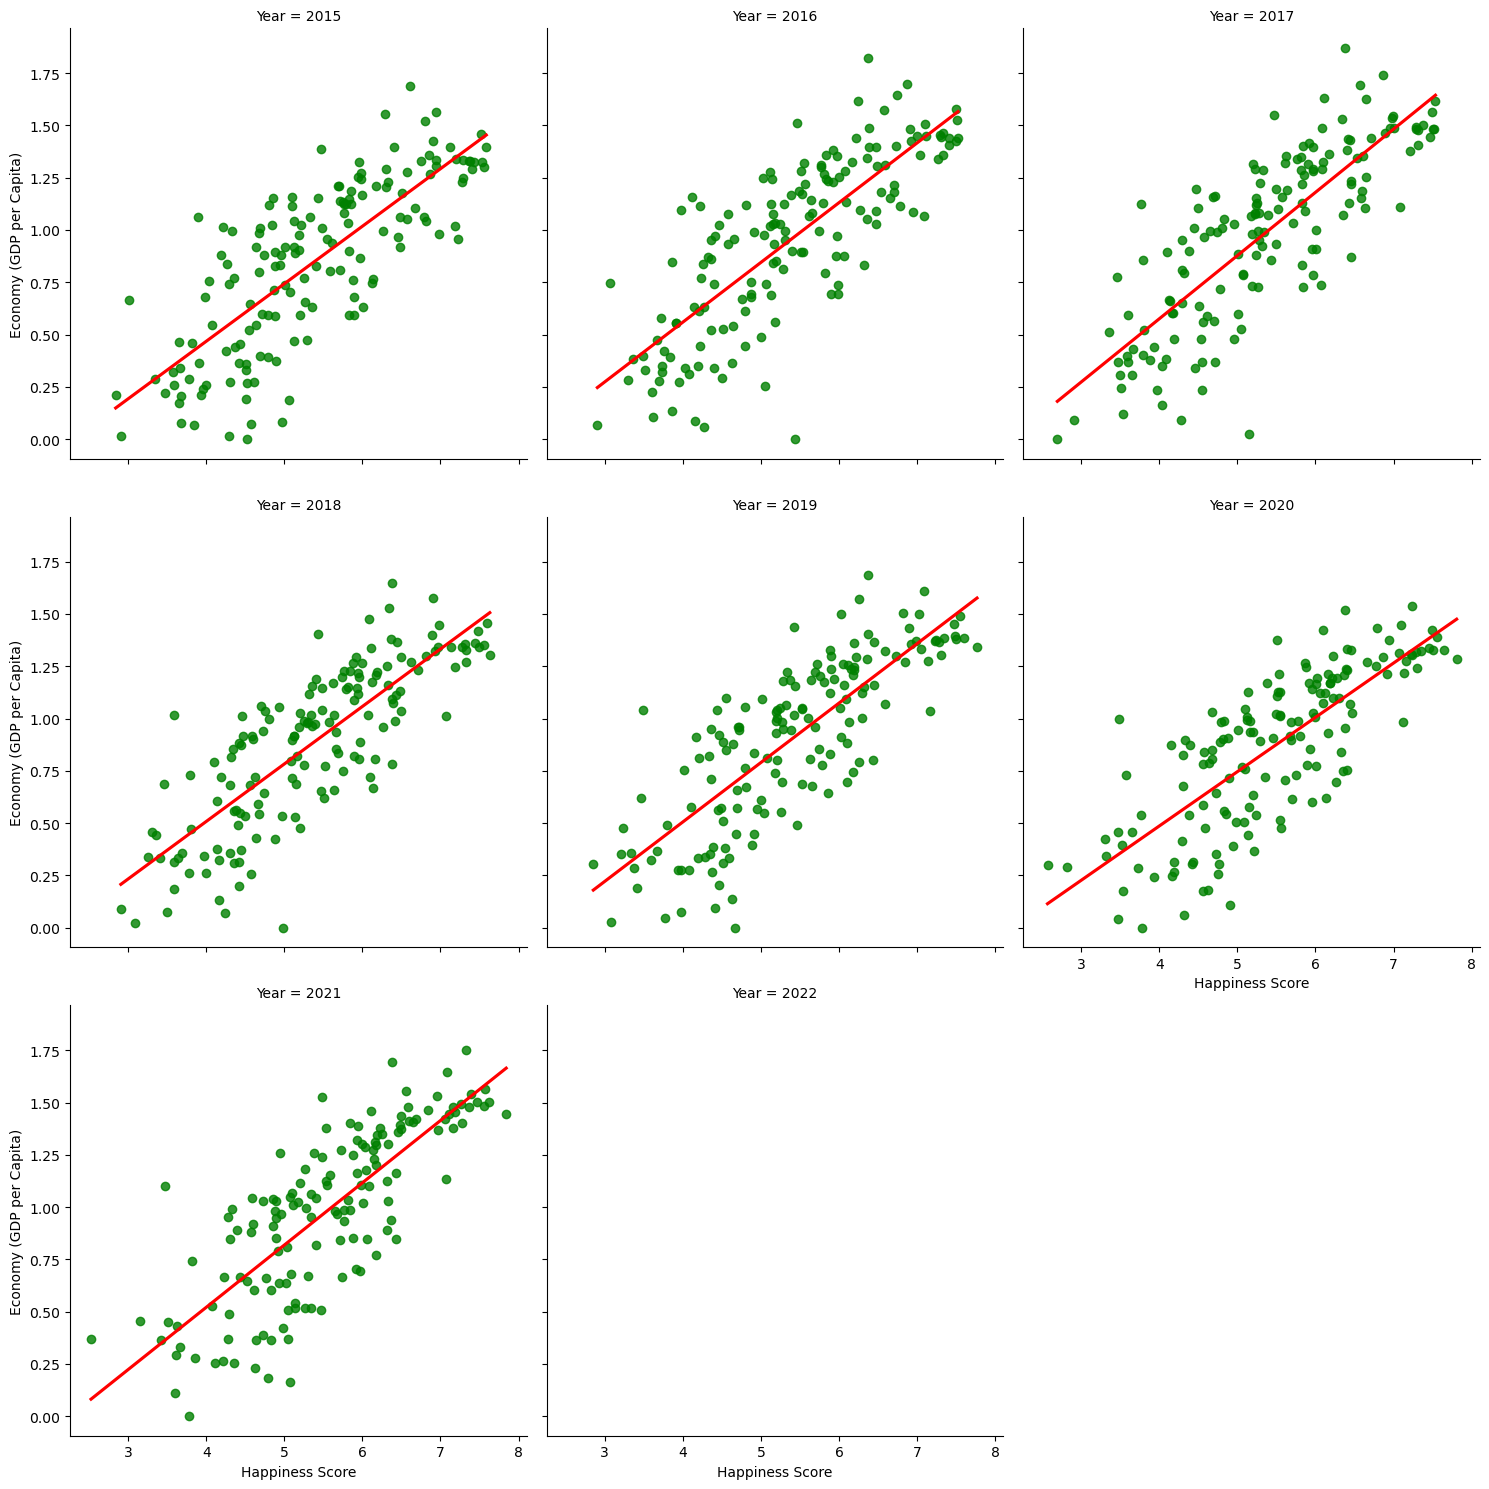

In [ ]:
sns.lmplot(x='Happiness Score', data = df1, col= 'Year', ci= False, scatter_kws = {'color':'green'}, col_wrap = 3,line_kws = {'color': 'red'}, y='Economy (GDP per Capita)', height =5) 

###### This graph shows the correlation between Economy (GDP per Capita) and happiness score for each year. It appears that in years 2017 and 2018 the correlation between these two variables was the highest. It appears that for year 2022 there are many null values (based on analysis 1) and therefore the graph does not provide any usefull statistics. I will be removing year 2022 from my dataset in task 2.

C:\Users\darya\AppData\Local\Temp\ipykernel_4604\3641812266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Economy (GDP per Capita)'])
C:\Users\darya\AppData\Local\Temp\ipykernel_4604\3641812266.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Family (Social Support)'])
C:\Use

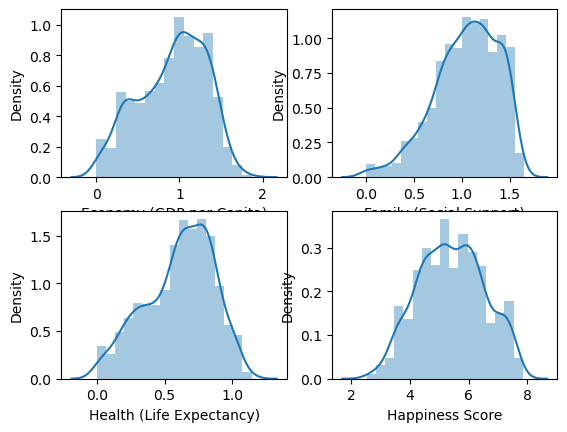

In [ ]:

# subplots

# subplot 1
plt.subplot(2, 2, 1)
#plt.title('Economy')
sns.distplot(df1['Economy (GDP per Capita)'])

# subplot 2
plt.subplot(2, 2, 2)
#plt.title('Family')
sns.distplot(df1['Family (Social Support)'])

# subplot 3
plt.subplot(2, 2, 3)
#plt.title('Health')
sns.distplot(df1['Health (Life Expectancy)'])

# subplot 4
plt.subplot(2, 2, 4)
#plt.title('Happiness Score')
sns.distplot(df1['Happiness Score'])

plt.show()

###### Histogram of the variables in our dataset shows how frequently a value falls into a particular bin.This graph helps me to underestand and indicate the spread of data for each column and what the minimum and maximum values are for each column. For example, in economy graph, the most repeated value is 0.9-1.1 with the minumum value of 0 and a maximum of 1.8, Family graph is 1-1.2 with the minumum value of 0 and a maximum of 1.7, Health is 0.6-0.8 with the minumum value of 0 and a maximum of ~1.15, and happiness is 5.0-5.3 with the minumum value of ~2.5 and a maximum of ~7.8. 

# Task 2: Data Analysis Pipeline

###### 1. Load the data.

In [ ]:
df1 = pd.read_csv('../data/raw/world_happiness_report.csv')

###### 2. Clean the data.

In [ ]:
df1 = df1[df1.Year != 2022]

df1

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1078,144,145,Lesotho,Sub-Saharan Africa,3.512,0.451,0.731,0.007,0.405,0.015,0.103,2021
1079,145,146,Botswana,Sub-Saharan Africa,3.467,1.099,0.724,0.34,0.539,0.088,0.027,2021
1080,146,147,Rwanda,Sub-Saharan Africa,3.415,0.364,0.202,0.407,0.627,0.493,0.227,2021
1081,147,148,Zimbabwe,Sub-Saharan Africa,3.145,0.457,0.649,0.243,0.359,0.075,0.157,2021


###### Based on analysis 1 and my third graph in task 1, there was many null values in the year of 2022 and therefore that year did not provide any useful variables. I decided to drop this year so it wouln't mess my fututre analysis.

In [ ]:
df1 = df1.copy().drop(['Happiness Rank', 'Country', 'Region', 'Freedom', 'Trust (Government Corruption)', 'Generosity'], axis=1)
df1

,Unnamed: 0,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Year
0,0,7.587,1.39651,1.34951,0.94143,2015
1,1,7.561,1.30232,1.40223,0.94784,2015
2,2,7.527,1.32548,1.36058,0.87464,2015
3,3,7.522,1.459,1.33095,0.88521,2015
4,4,7.427,1.32629,1.32261,0.90563,2015
...,...,...,...,...,...,...
1078,144,3.512,0.451,0.731,0.007,2021
1079,145,3.467,1.099,0.724,0.34,2021
1080,146,3.415,0.364,0.202,0.407,2021
1081,147,3.145,0.457,0.649,0.243,2021


###### Since my question is specifically about economy, social life, life expectancy, and happiness score in each year, I'm dropping the other columns in the dataset that I don't need. 

In [ ]:
df1= df1.copy().drop(df1.columns[0], axis=1)
print(df1.shape)
df1

(1083, 5)


,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Year
0,7.587,1.39651,1.34951,0.94143,2015
1,7.561,1.30232,1.40223,0.94784,2015
2,7.527,1.32548,1.36058,0.87464,2015
3,7.522,1.459,1.33095,0.88521,2015
4,7.427,1.32629,1.32261,0.90563,2015
...,...,...,...,...,...
1078,3.512,0.451,0.731,0.007,2021
1079,3.467,1.099,0.724,0.34,2021
1080,3.415,0.364,0.202,0.407,2021
1081,3.145,0.457,0.649,0.243,2021


###### I will not be working with column[0] because it does not relate to my question and doesn't provide any useful information for my analysis. For that reason, I decided to drop this column too. 

In [ ]:
df1 = df1.dropna(axis=0)
df1.shape

(1083, 5)

###### Removed all the null values in my dataset.

In [ ]:
check_nan = df1.isnull().values.any()
print(check_nan)

False


###### Made sure there are no null values in the dataset I'm working with.

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 0 to 1082
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Happiness Score           1083 non-null   object
 1   Economy (GDP per Capita)  1083 non-null   object
 2   Family (Social Support)   1083 non-null   object
 3   Health (Life Expectancy)  1083 non-null   object
 4   Year                      1083 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 50.8+ KB


In [ ]:
df1["Happiness Score"]=df1["Happiness Score"].astype(float)
df1["Economy (GDP per Capita)"]=df1["Economy (GDP per Capita)"].astype(float)
df1["Family (Social Support)"]=df1["Family (Social Support)"].astype(float)
df1["Health (Life Expectancy)"]=df1["Health (Life Expectancy)"].astype(float)

In [ ]:
df2 = df1.iloc[:, :4]
normalized_df1 = normalize(df2)
normalized_df1["Year"] = df1["Year"]
print(normalized_df1)

      Happiness Score  Economy (GDP per Capita)  Family (Social Support)  \
0            0.952059                  0.746491                 0.820870   
1            0.947171                  0.696143                 0.852938   
2            0.940778                  0.708523                 0.827603   
3            0.939838                  0.779895                 0.809580   
4            0.921978                  0.708956                 0.804507   
...               ...                       ...                      ...   
1078         0.185937                  0.241078                 0.444647   
1079         0.177477                  0.587460                 0.440389   
1080         0.167701                  0.194573                 0.122871   
1081         0.116939                  0.244285                 0.394769   
1082         0.000000                  0.197780                 0.000000   

      Health (Life Expectancy)  Year  
0                     0.825092  2015  
1        

###### This helps with my future analysis because by taking this step, all the values in my dataset will be between 0-1. By doing this, the correlation between my variables will be more accurate and the graphs will make more sense.

In [ ]:
normalized_df1

,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Year
0,0.952059,0.746491,0.820870,0.825092,2015
1,0.947171,0.696143,0.852938,0.830710,2015
2,0.940778,0.708523,0.827603,0.766556,2015
3,0.939838,0.779895,0.809580,0.775819,2015
4,0.921978,0.708956,0.804507,0.793716,2015
...,...,...,...,...,...
1078,0.185937,0.241078,0.444647,0.006135,2021
1079,0.177477,0.587460,0.440389,0.297984,2021
1080,0.167701,0.194573,0.122871,0.356705,2021
1081,0.116939,0.244285,0.394769,0.212971,2021


In [ ]:
df2 = df1.groupby(['Year'], as_index = False, sort = False)['Economy (GDP per Capita)',
                                           'Family (Social Support)', 'Health (Life Expectancy)','Happiness Score'].mean()
#df2 = normalized_df1.groupby("Year")["Economy (GDP per Capita)", "Family (Social Support)","Year", "Health (Life Expectancy)"].mean().sort_values(by = ['Happiness Score'], ascending = False)
print(df2)


   Year  Economy (GDP per Capita)  Family (Social Support)  \
0  2015                  0.846137                 0.991046   
1  2016                  0.953880                 0.793621   
2  2017                  0.984718                 1.188898   
3  2018                  0.883677                 1.216058   
4  2019                  0.905147                 1.208814   
5  2020                  0.868771                 1.155607   
6  2021                  0.977161                 0.793315   

   Health (Life Expectancy)  Happiness Score  
0                  0.630259         5.375734  
1                  0.557619         5.382185  
2                  0.551341         5.354019  
3                  0.596877         5.366897  
4                  0.725244         5.407096  
5                  0.692869         5.473240  
6                  0.520161         5.532839  


C:\Users\darya\AppData\Local\Temp\ipykernel_4604\2957738615.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df1.groupby(['Year'], as_index = False, sort = False)['Economy (GDP per Capita)',


###### I also took the average for each column in my dataset in case I would need for future analysis and visualization. 

In [ ]:
normalized_df1.to_csv('../data/processed/world_happiness_report_processed_Notebook3.csv')


###### Saved my edited data into the processed folder. 

# Task 3: Method Chaining 

In [ ]:
import pandas as pd
import numpy as np 

def load_and_process(url_or_path_to_csv_file):


    df1 = (
        pd.read_csv(url_or_path_to_csv_file))

    df2 = ( df1.transform(pd.to_numeric, errors='coerce')
         .copy().drop(['Happiness Rank', 'Country', 'Region', 'Freedom', 'Trust (Government Corruption)', 'Generosity'], axis=1)
         .copy().drop(df1.columns[0], axis=1)
         .dropna(axis=0))
    
    df3 = (df1[df1.Year != 2022])
 
    
    # Make sure to return the latest dataframe
    return df3

In [ ]:
import project_functions3 as p3

SyntaxError: invalid syntax (project_functions3.py, line 4)

In [ ]:
normalized_df1 = p3.load_and_process('../data/raw/world_happiness_report.csv'))
normalized_df1

# Task 4: Data Analysis 

### Fig.1 

<seaborn.axisgrid.PairGrid>

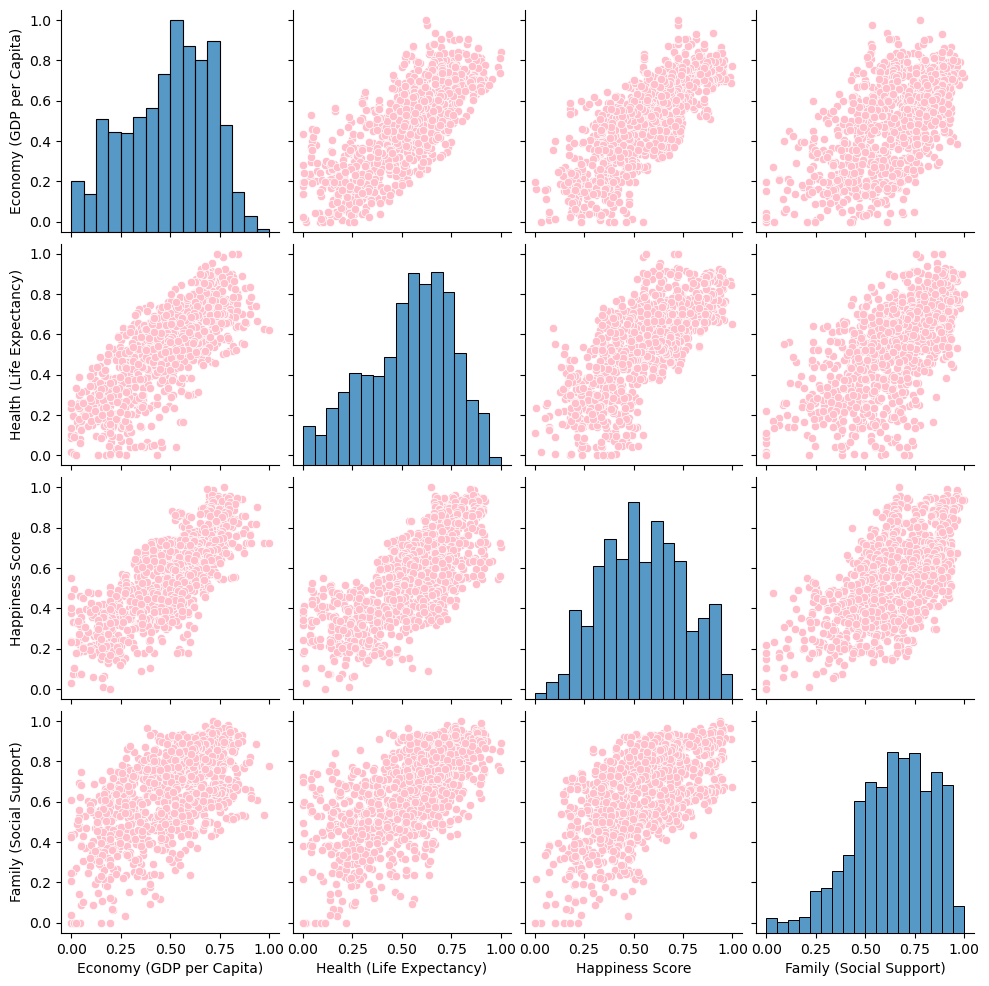

In [ ]:
sns.pairplot(normalized_df1[["Economy (GDP per Capita)",'Health (Life Expectancy)', 'Happiness Score',"Family (Social Support)"]], plot_kws={'color':'pink'})

##### The scatterplots between all of my variables look nice on this graph. I can now see the relationships between all of these factors. The strongest relationships between the happiness score and the economy (GPD per capita) and health (Life Expectancy). Social life and Happiness Score are correlated, but not as strongly as life expectancy and the economy.

In [ ]:
#df2.plot(kind='scatter', y= 'Happiness Score', x= 'Year').set_title("Highest happiness score")


### Fig.2

<seaborn.axisgrid.PairGrid>

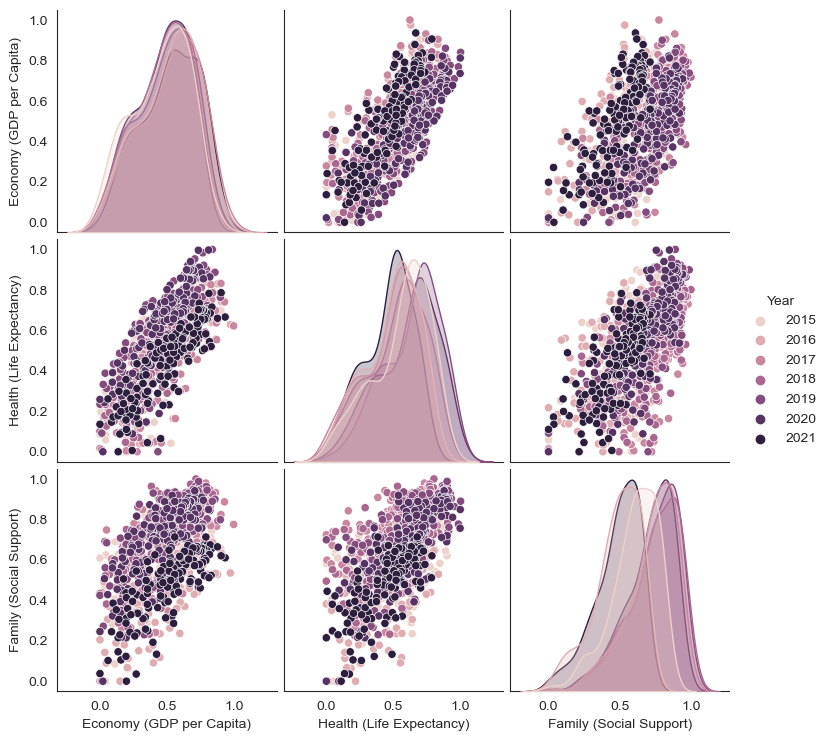

In [ ]:
sns.pairplot(normalized_df1[["Economy (GDP per Capita)",'Health (Life Expectancy)', "Family (Social Support)", 'Year']], plot_kws={'color':'green'}, hue ='Year')

##### To see the correlation between Economy (GDP per Capita), Health (Life Expectancy), and Family (Social Support). This graph displays the correlation between these variables for each year between 2015 and 2021 using years as my hue. The economic situation and health have the strongest association. Although the focus of my inquiry is not on the relationship between these variables, I was curious to see whether they were all interconnected. Additionally, I can see that the economy was reasonably stable from 2015 to 2021. Social life is the most unstable variable because it has been changing from 2015 to 2021.

### Fig.3

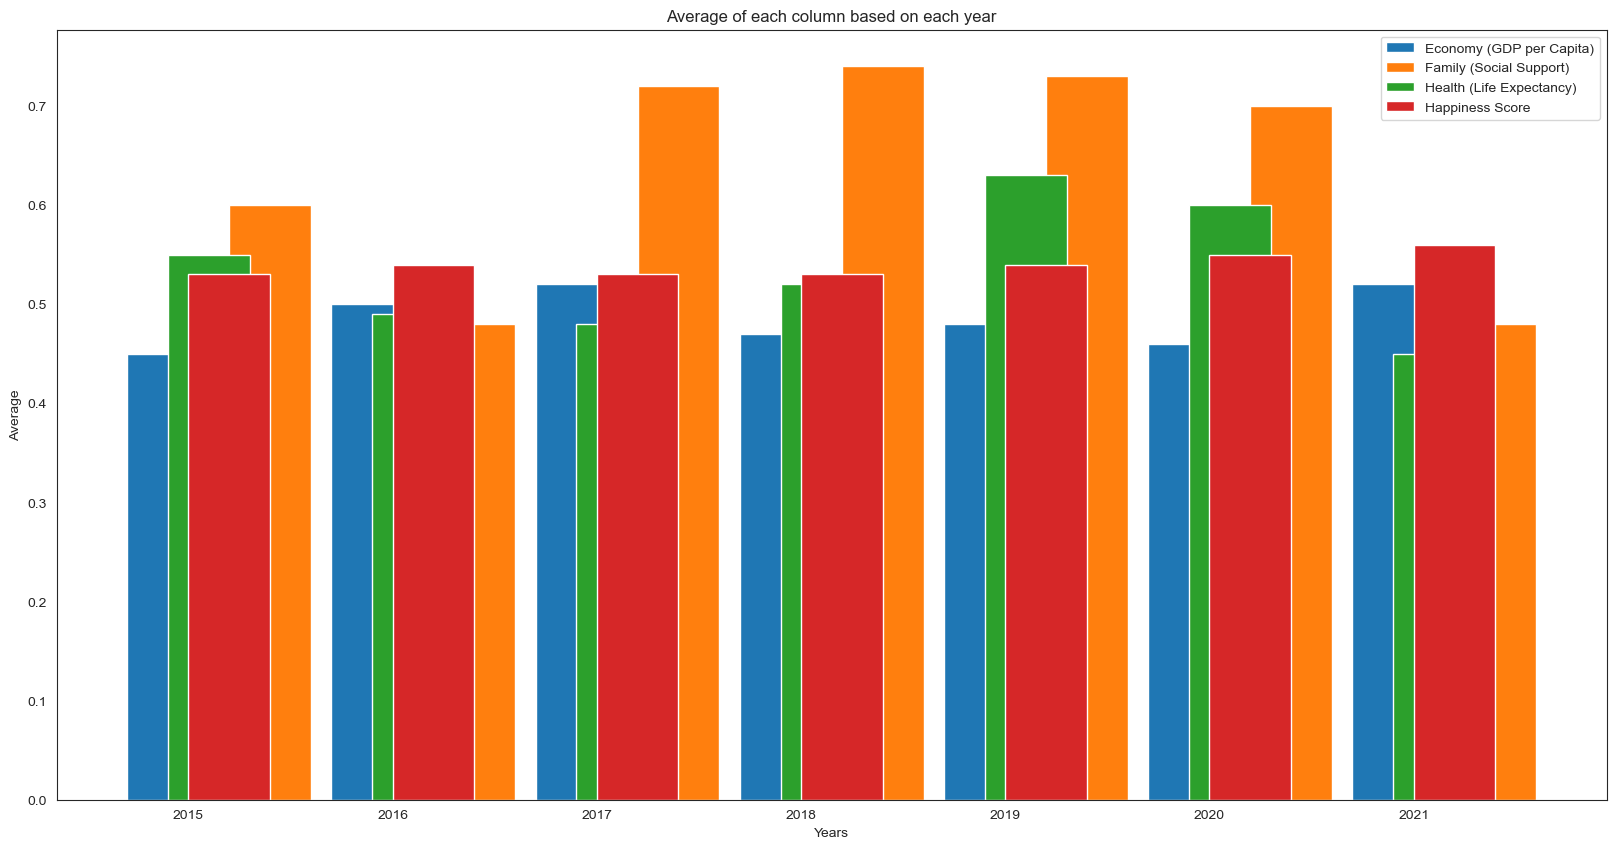

In [ ]:
X = ['2015','2016','2017','2018', '2019', '2020', '2021']
Economy = [0.45,0.50,0.52,0.47,0.48,0.46,0.52]
family = [0.60,0.48,0.72,0.74,0.73,0.70,0.48]
health= [0.55,0.49,0.48,0.52,0.63,0.60,0.45]
Happiness_Score =[0.53,0.54,0.53,0.53,0.54,0.55,0.56]
X_axis = np.arange(len(X))

f, ax = plt.subplots(figsize=(20,10))  
plt.bar(X_axis - 0.1, Economy, 0.4, label = 'Economy (GDP per Capita)')
plt.bar(X_axis + 0.4, family, 0.4, label = 'Family (Social Support)')
plt.bar(X_axis + 0.1, health, 0.4, label = 'Health (Life Expectancy)')
plt.bar(X_axis + 0.2, Happiness_Score, 0.4, label = 'Happiness Score')


plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Average")
plt.title("Average of each column based on each year")
plt.legend()
plt.show()


##### this graph shows the average of each index from all countries in a given year, and is therefore useful to observe the necessary trends in analyzing my particular research question. From this plot, it is clear that happiness score remains relatively stable throughout the years. Social Support has ballooned since 2017, but interestingly plumetted in 2021. Life expectancy also decreased in 2021. Although this plot is useful in observing such trends, the following line graph will be more suitable to analyze the relationships between these variables.

### Fig.4

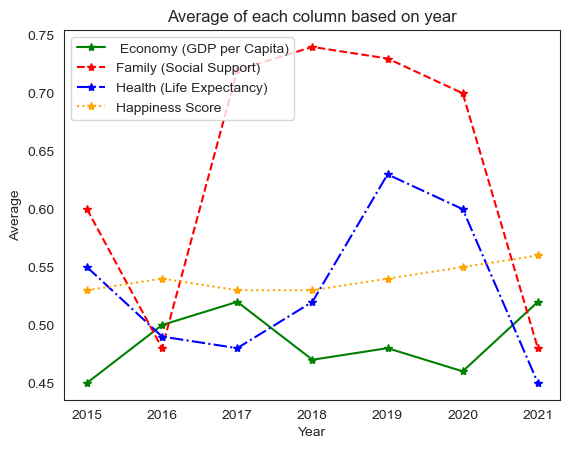

In [ ]:
X = ['2015','2016','2017','2018', '2019', '2020', '2021']
y1 = [0.45,0.50,0.52,0.47,0.48,0.46,0.52]
y2 = [0.60,0.48,0.72,0.74,0.73,0.70,0.48]
y3= [0.55,0.49,0.48,0.52,0.63,0.60,0.45]
y4 =[0.53,0.54,0.53,0.53,0.54,0.55,0.56]

fig, ax = plt.subplots()
plt.plot(X, y1 , label = " Economy (GDP per Capita)", color = 'green', linestyle="-",marker= '*')
plt.plot(X, y2, label = "Family (Social Support)", color='red', linestyle="--", marker= '*')
plt.plot(X,y3, label ='Health (Life Expectancy)',color='blue', linestyle="-.", marker='*')
plt.plot(X,y4, label ='Happiness Score',color='orange', linestyle=":", marker='*')
plt.title('Average of each column based on year')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend(loc= 'upper left')
plt.show()

##### I included the average of each column in this graph as well to examine their relationship. Over time, it has become clear that as the economic grows, so does the happiness score, and that as the economy declines, so does the happiness score. Therefore, it is clear that economy and happiness follow a similar trend throughout the years. However, we can observe that from 2017 to 2018, the GDP per capita index dropped, but the happiness score kept growing at a very slow pace. This growth can be attributed to the boom observed in both family support and life expectancy in this period

### Fig.5

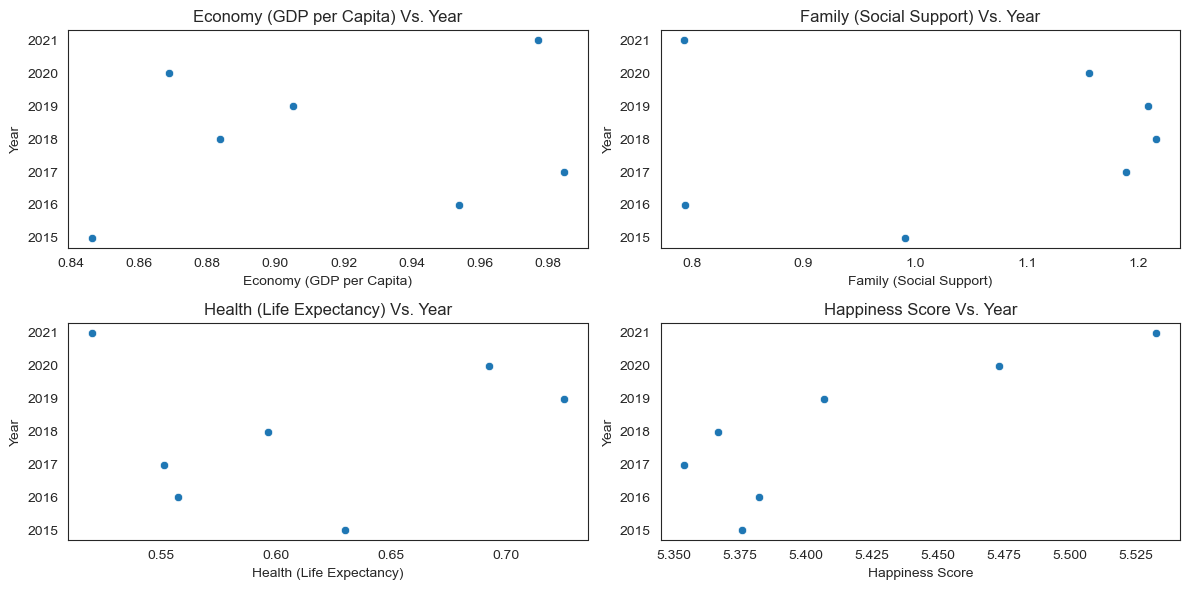

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(12,6))


sns.scatterplot(x='Economy (GDP per Capita)', y='Year', data= df2, ax= axes[0,0])
axes[0,0].set_title('Economy (GDP per Capita) Vs. Year')


sns.scatterplot(x='Family (Social Support)', y='Year', data=df2,ax= axes[0,1] )
axes[0,1].set_title('Family (Social Support) Vs. Year')

sns.scatterplot(x='Health (Life Expectancy)', y='Year', data=df2, ax= axes[1,0])
axes[1,0].set_title('Health (Life Expectancy) Vs. Year')

sns.scatterplot(x='Happiness Score', y='Year', data=df2,ax= axes[1,1] )
axes[1,1].set_title('Happiness Score Vs. Year')

ax.set(ylabel="Year")
plt.tight_layout();
for ax in axs.flat:
    ax.label_outer()

##### Here, I include every variable along with its average for the years 2015 through 2021. The highest economic rate and the highest happiness score were both in 2021, as shown in graph 1 (Economy Vs. Year). Therefore, the happiness score based on years has been significantly impacted by the economy. Because social life in 2018 reached its highest score but happiness experienced its second-lowest score in 2018, I believe that social life has no impact on happiness scores. The year 2021, when happiness is highest, also has the lowest life expectancy. Accordingly, I believe that the economy is the most significant factor that can influence happiness scores throughout time. 

In [ ]:
#sns.scatterplot(x= 'Happiness Score', hue = 'Year', data = df1, y='Family (Social Support)')

In [ ]:
#sns.scatterplot(x= 'Happiness Score', hue = 'Year', data = normalized_df1, y='Economy (GDP per Capita)')

In [ ]:
#sns.lmplot(data=df1 ,x="Economy (GDP per Capita)", y= 'Year')

In [ ]:
#ax = sns.lineplot(x = 'Happiness Score', y= 'Family (Social Support)', hue = "Year", data = df1)

In [ ]:
#ax = sns.barplot(x = 'Happiness Score', y= 'Economy (GDP per Capita)',  data = df2)

In [ ]:
#ax = sns.barplot(x = 'Happiness Score', y= 'Family (Social Support)',  data = df2)

In [ ]:
#ax = sns.barplot(x = 'Family (Social Support)', y= 'Economy (GDP per Capita)', errorbar=('ci', False),  data = df2)


In [ ]:
#sns.lmplot(x='Happiness Score', data = df1, hue= 'Year', ci= False, y='Economy (GDP per Capita)', height =6)

In [ ]:
#sns.lmplot(x='Happiness Score', data = df1, hue= 'Year', ci= False, y='Family (Social Support)', height =6)

In [ ]:
#df3 = df2[['Happiness Score','Economy (GDP per Capita)','Family (Social Support)','Health (Life Expectancy)']].copy()
#g = df3.groupby('Year')
#g.plot.barh()
#plt.tight_layout()
#plt.show()

In [ ]:
#df3 = df2[['Happiness Score','Economy (GDP per Capita)','Family (Social Support)','Health (Life Expectancy)']].copy()
#g = df3.groupby('Year')
#g.plot.barh()
#plt.tight_layout()
#plt.show()

In [ ]:
#df2 = pd.DataFrame({'X_Axis':['2021','2020','2019','2016', '2015', '2018', '2017'],
                    #'Y_Axis':[5.53, 5.47,5.40,5.38,5.37,5.36,5.35],
                    #'col_Economy':[0.97, 0.86, 0.90, 0.95, 0.84, 0.88, 0.98],
                    #'col_Social.life':[0.79, 1.15, 1.20, 0.79, 0.99, 1.21,1.18],
                    #'col_Health':[0.52, 0.69, 0.72,0.55,0.63,0.59,0.55]})
                
#display(df2)
#df = df2.melt('X_Axis', var_name='cols')
#display(df.head())

#df = df2.reset_index().melt('index', var_name='cols')
#g = sns.catplot(x="X_Axis", hue='cols', data=df, kind='point')

In [ ]:
#plt.plot(df2['Economy (GDP per Capita)'])
#plt.plot(df2['Family (Social Support)'])

#plt.show()

In [ ]:
#ax = sns.lineplot(markers = True, legend = 'full', x = 'Year', y= 'Family (Social Support)',markers=True,errorbar=('ci', False), data = df1)
#ax = sns.lineplot(markers = True , legend = 'full', x = 'Year', y= 'Economy (GDP per Capita)',markers=True,errorbar=('ci', False),data = df2)
#ax = sns.lineplot(x = 'Year', y= 'Health (Life Expectancy)',markers=True,errorbar=('ci', False), data = df2)

#plt.legend(title='Variables', loc='upper left', values = c('blue','orange'), labels=['Economy', 'Family'] ) 


In [ ]:
#ax = sns.lineplot(markers,True,x = 'Happiness Score', y= 'Economy (GDP per Capita)',markers=True,errorbar=('ci', False), data = df2)


In [ ]:
#ax = sns.lineplot(x='Economy (GDP per Capita)', y='Year', data = df1)

In [ ]:
#sns.pairplot(normalized_df1[["Economy (GDP per Capita)",'Health (Life Expectancy)', "Family (Social Support)", 'Year']], plot_kws={'color':'green'}, hue ='Year')

In [ ]:
#sns.pairplot(df1[["Economy (GDP per Capita)",'Health (Life Expectancy)', "Family (Social Support)", 'Year']], height= 10, kind = 'reg',hue ='Year')

In [ ]:
#ax = sns.jointplot(x= 'Happiness Score',kind ='reg',color='navy', y ='Economy (GDP per Capita)',data =normalized_df1)

In [ ]:
#ax = sns.jointplot(x= 'Happiness Score', y ='Family (Social Support)',data =normalized_df1, hue ='Year')